In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
df = pd.read_csv("Match_Winner.csv")
print("Original dataset shape:", df.shape)

Original dataset shape: (9380, 22)


In [11]:
drop_cols = ["Season", "MatchDate", "FullTimeHomeGoals", "FullTimeAwayGoals"]
df = df.drop(columns=drop_cols, errors="ignore")
print(df.columns)

Index(['HomeTeam', 'AwayTeam', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')


In [12]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [13]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 HomeTeam             0
AwayTeam             0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64


In [15]:
#One Hot Encoding
df = pd.get_dummies(df, columns=["HomeTeam", "AwayTeam"], prefix=["Home", "Away"])
print(df.head)

<bound method NDFrame.head of      FullTimeResult  HalfTimeHomeGoals  HalfTimeAwayGoals HalfTimeResult  \
0                 H                  2                  0              H   
1                 H                  1                  0              H   
2                 A                  1                  1              D   
3                 D                  1                  2              A   
4                 H                  2                  0              H   
...             ...                ...                ...            ...   
9375              H                  2                  1              H   
9376              D                  1                  0              H   
9377              D                  1                  1              D   
9378              H                  1                  0              H   
9379              D                  0                  0              D   

      HomeShots  AwayShots  HomeShotsOnTarget  AwayShotsO

In [16]:
# Label Encoding
encoder = LabelEncoder()
for col in ["FullTimeResult", "HalfTimeResult"]:
    df[col] = encoder.fit_transform(df[col])
df.head()

,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,...,Away_Southampton,Away_Stoke,Away_Sunderland,Away_Swansea,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wigan,Away_Wolves
0,2,2,0,2,17,8,14,4,6,6,...,False,False,False,False,False,False,False,False,False,False
1,2,1,0,2,17,12,10,5,7,7,...,False,False,False,False,False,False,False,True,False,False
2,0,1,1,1,6,16,3,9,8,4,...,False,False,False,False,False,False,False,False,False,False
3,1,1,2,0,6,13,4,6,5,8,...,True,False,False,False,False,False,False,False,False,False
4,2,2,0,2,17,12,8,6,6,4,...,False,False,False,False,False,False,False,False,False,False


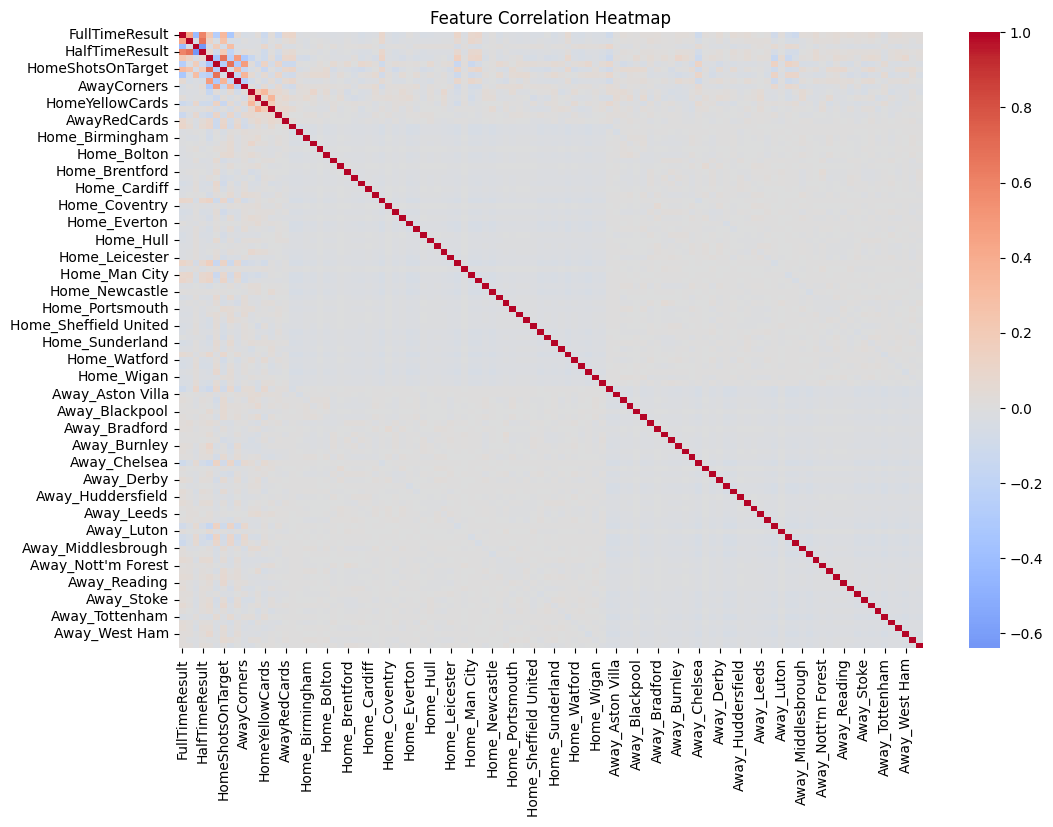

In [17]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
print("Correlation with FullTimeResult:\n")
print(corr["FullTimeResult"].sort_values(ascending=False).head(10))


Correlation with FullTimeResult:

FullTimeResult       1.000000
HalfTimeResult       0.596965
HalfTimeHomeGoals    0.432693
HomeShotsOnTarget    0.323645
HomeShots            0.224808
Home_Liverpool       0.103938
Home_Arsenal         0.103739
Home_Man United      0.098950
AwayRedCards         0.093704
Home_Chelsea         0.093212
Name: FullTimeResult, dtype: float64


In [19]:
X = df.drop(columns=["FullTimeResult"])
y = df["FullTimeResult"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

# Predictions & Metrics
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Confusion Matrix:
 [[403  63  88]
 [163  82 217]
 [ 78  81 701]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.67       554
           1       0.36      0.18      0.24       462
           2       0.70      0.82      0.75       860

    accuracy                           0.63      1876
   macro avg       0.56      0.57      0.55      1876
weighted avg       0.59      0.63      0.60      1876



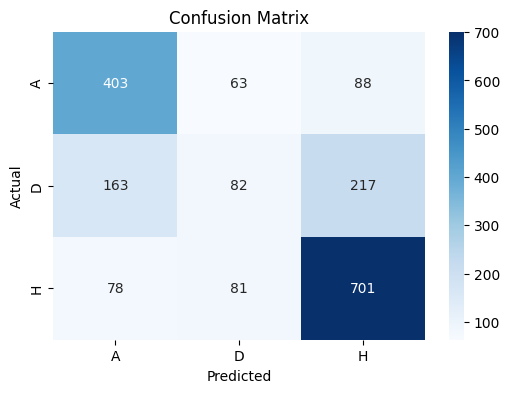

In [20]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()